## Project Stage - IV (Basic Machine Learning)  

## Goals

The goal of Stage IV is to utlize machine learning and statistical models to predict the trend of COVID-19 cases / deaths.


### Tasks for Stage IV: (The total grade will be 80 points.)

#### Task 1: 

- Member: (60 points)
    - Utilize Linear and Non-Linear (polynomial with degree n) regression models to compare trends for a single state (each member should choose different state) and its counties (top 5 with highest number of cases). Start your data from 2020.06.01 (Monday) to 2021.01.03 (Sunday). 
        - X-Axis - number of days, Y-Axis number of new cases and deaths. Calcluate error using RMSE.(10 points)
        - Identify which counties are most at risk. Model for top 5 counties with cases within a state and describe their trends. (10 points)
        - Perform hypothesis tests on questions identified in Stage III. (30 points)
            - e.x. *Does higher employment data (overall employment numbers) lead to higher covid case numbers or more rapid increase in covid cases.*. Here you would compare the covid cases to the state or county level enrichment data to prove or disprove your null hypothesis. In this case there will be a two tail - two sample t-test to see if there is a difference and then one-tail - two sample t-test to show higher or lower.
            - you can also make 3 new hypotheses and do hypothesis tests on them.
            - Depending on your type of data you can also perform Chi-square test for categorical hypothesis testing. 
    - For each of the aforemention analysis plot figures, the figures should include (10 points)
        - trend line (based on the datasets from 2020.06.01 (Monday) to 2021.01.03 (Sunday)).
        - prediction path (forecast 1 week).
        - confidence intervals (error in prediction). (Further materials you may need to explore: https://lmc2179.github.io/posts/confidence_prediction.html; https://www.geeksforgeeks.org/how-to-plot-a-confidence-interval-in-python/)

**Deliverable**
- Each member creates separate notebooks for member tasks.
- Upload all notebooks and reports to Canvas. Attention: You need to submit both the team work and the member work. The team work will have a same grade within you teammates.

In the upcoming Project Stage IV Review presentation on April 1, 2024, each group will have up to 15 minutes slot to showcase their results. It's strongly suggested that you use PowerPoint for your presentation. This will also facilitate seamless compilation of everyone's contributions for our end-of-semester final presentation

Presentation order:

# Utilize Linear and Non-Linear (polynomial with degree n) regression models to compare trends for a single state (each member should choose different state) and its counties (top 5 with highest number of cases). Start your data from 2020.06.01 (Monday) to 2021.01.03 (Sunday).

## X-Axis - number of days, Y-Axis number of new cases and deaths. Calcluate error using RMSE.(10 points)

In [9]:
import pandas as pd
import seaborn as sns
import numpy as np
import datetime
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.compose import make_reduction
from sklearn.metrics import mean_squared_error
from sktime.utils.plotting import plot_series

#Using the functions that Kol used.
cases = pd.read_csv("covid_confirmed_usafacts.csv")
deaths = pd.read_csv("covid_deaths_usafacts.csv")

def get_dates(data): #function from stage 2
    dates = data.loc[:, [i not in ["countyFIPS","County Name", "State", "StateFIPS"] for i in data]] #Extract non dates
    
    dates.columns = pd.to_datetime(dates.columns) #Fix columns to be date times
    
    dates = dates.loc[:, [(i >= datetime.datetime(2020, 5, 25)) and (i <= datetime.datetime(2021, 1, 10)) for i in dates]] #Extract correct time
    return dates #make dates start 1 week earlier for get_weekly() purposes

def get_weekly(dates): #tweaked function from stage 2

    weeks = [range(i, i + 7) for i in range(0, len(dates.columns), 7)]
    dates.iloc[:, weeks[0]]
    
    stats = pd.DataFrame({"week": [],"sum" : []})
    
    for i in range(len(weeks)-1):
        date = dates.iloc[:, weeks[i+1]].iloc[0, :].keys()[0]
        #Subtract numbers from previous week to get new case/death data (current data is cumulative)
        week = (dates.iloc[:, weeks[i+1]].sum(axis = 1)) - (dates.iloc[:, weeks[i]].sum(axis = 1))
        wsum = week.sum()/7/7
        new_row = pd.DataFrame({"week": date,"sum" : (wsum)}, index=[i])
        stats = pd.concat([stats, new_row])
    return stats

cases

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2023-07-14,2023-07-15,2023-07-16,2023-07-17,2023-07-18,2023-07-19,2023-07-20,2023-07-21,2023-07-22,2023-07-23
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,19913,19913,19913,19913,19913,19913,19913,19913,19913,19913
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,70521,70521,70521,70521,70521,70521,70521,70521,70521,70521
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,7582,7582,7582,7582,7582,7582,7582,7582,7582,7582
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,8149,8149,8149,8149,8149,8149,8149,8149,8149,8149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,56037,Sweetwater County,WY,56,0,0,0,0,0,0,...,12645,12645,12645,12645,12645,12645,12645,12645,12645,12645
3189,56039,Teton County,WY,56,0,0,0,0,0,0,...,12206,12206,12206,12206,12206,12206,12206,12206,12206,12206
3190,56041,Uinta County,WY,56,0,0,0,0,0,0,...,6468,6468,6468,6468,6468,6468,6468,6468,6468,6468
3191,56043,Washakie County,WY,56,0,0,0,0,0,0,...,2640,2640,2640,2640,2640,2640,2640,2640,2640,2640


In [11]:
fl_cases = cases[cases["State"] == "FL"]
fl_deaths = deaths[deaths["State"] == "FL"]

fl_cases

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2023-07-14,2023-07-15,2023-07-16,2023-07-17,2023-07-18,2023-07-19,2023-07-20,2023-07-21,2023-07-22,2023-07-23
329,0,Statewide Unallocated,FL,12,0,0,0,0,0,0,...,20363,20363,20363,20363,20363,20363,20363,20363,20363,20363
330,12001,Alachua County,FL,12,0,0,0,0,0,0,...,90634,90634,90634,90634,90634,90634,90634,90634,90634,90634
331,12003,Baker County,FL,12,0,0,0,0,0,0,...,10787,10787,10787,10787,10787,10787,10787,10787,10787,10787
332,12005,Bay County,FL,12,0,0,0,0,0,0,...,55836,55836,55836,55836,55836,55836,55836,55836,55836,55836
333,12007,Bradford County,FL,12,0,0,0,0,0,0,...,9324,9324,9324,9324,9324,9324,9324,9324,9324,9324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,12125,Union County,FL,12,0,0,0,0,0,0,...,5140,5140,5140,5140,5140,5140,5140,5140,5140,5140
393,12127,Volusia County,FL,12,0,0,0,0,0,0,...,152326,152326,152326,152326,152326,152326,152326,152326,152326,152326
394,12129,Wakulla County,FL,12,0,0,0,0,0,0,...,12314,12314,12314,12314,12314,12314,12314,12314,12314,12314
395,12131,Walton County,FL,12,0,0,0,0,0,0,...,19888,19888,19888,19888,19888,19888,19888,19888,19888,19888


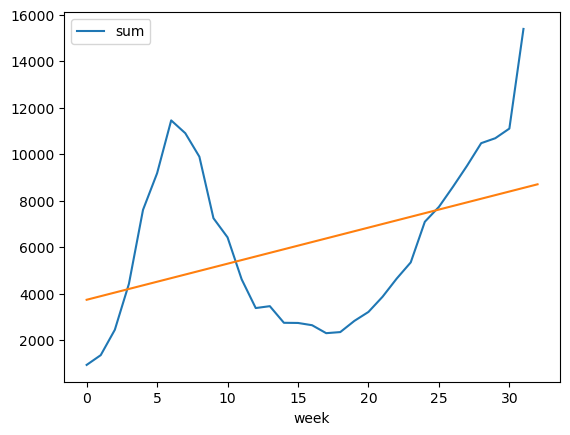

In [31]:
def create_linear_plot(data):
    data_dates = get_dates(data)
    data_weekly = get_weekly(data_dates)
    #Make cases have an int rather than a date for regression.
    data_weekly["week"] = [i for i in range(len(fl_cases_weekly))]
    
    #Initial plot
    data_weekly.plot(x = "week")
    
    #Make linear regression for cases

    lin_reg = LinearRegression()
    X = np.array(data_weekly["week"]).reshape(-1,1)
    lin_reg.fit(X, data_weekly["sum"])
    
    
    #Initial plot

    X_reg = np.array([i for i in range(len(data_weekly) + 1)]).reshape(-1,1)
    y_reg = lin_reg.predict(X_reg)

    plt.plot(X_reg,y_reg)
    
    
    

create_linear_plot(fl_cases)



LinearRegression()

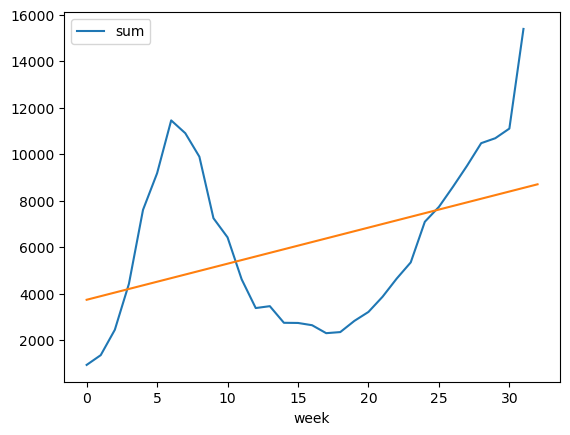

AttributeError: 'LinearRegression' object has no attribute 'plot'

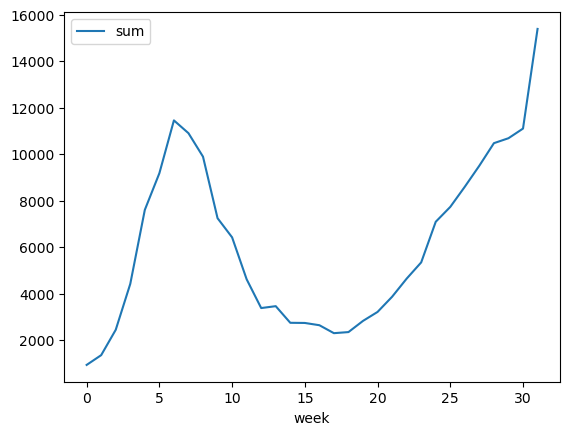

In [25]:
fl_dates_deaths = get_dates(fl_deaths)
fl_cases_deaths = get_weekly(fl_dates_deaths)



## Identify which counties are most at risk. Model for top 5 counties with cases within a state and describe their trends. (10 points)

In [1]:
#TODO

## Perform hypothesis tests on questions identified in Stage III. (30 points)


### Hypothosis questions:
    
1) Does having a higher total population of hispanic or latino people of any race lead to more covid-19 infections

2) Does having more people of 35 to 44 years of age lead to fewer covid-19 infections

3) does having more people aged 60 to 64 lead to more covid-19 cases

In [ ]:
#TODO